In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('heart+disease/processed.cleveland.data', sep=',')
df.columns = ['age',        # Age
                'sex',        # Sex
                'cp',         # Chest pain type
                'trestpbs',   # Resting blood pressure
                'chol',       # Serum cholestoral in mg/dl
                'fbs',        # Fasting blood sugar > 120 mg/dl (boolean)
                'restecg',    # Resting electrocardiographic results
                'thalach',    # Maximum heartrate achieved
                'exang',      # Exercise induced angina
                'oldpeak',    # ST depression induced by exercise relative to rest
                'slope',      # The slope of the peak exercise ST segment
                'ca',         # Number of major vessels
                'thal',       # Normal / fixed defect / reversable defect
                'class',      # Diagnosis of heart disease ( No presence 0 - 4 Very likely )
                ]

In [3]:
df

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
df['class'].value_counts()

class
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

### Simplify target column

In [5]:
# df['class'] = df['class'].apply(lambda x: 0 if x == 0 else 1)
df['class'] = df['class'].apply(lambda x: 0 if x == 0.0 else 1.0)

In [6]:
df['class'].value_counts()

class
0.0    163
1.0    139
Name: count, dtype: int64

In [7]:
df.head(10)

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0.0


In [8]:
df.tail()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0.0


In [9]:
df['ca'].values

array(['3.0', '2.0', '0.0', '0.0', '0.0', '2.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '2.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '1.0', '1.0', '0.0', '3.0', '0.0', '2.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '3.0', '0.0',
       '1.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0',
       '2.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '3.0', '3.0', '0.0', '0.0', '1.0', '1.0', '2.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '1.0', '3.0', '0.0', '1.0', '1.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '3.0', '1.0', '2.0', '3.0', '0.0', '0.0', '1.0', '0.0', '2.0',
       '1.0', '0.0',

In [10]:
df = df[(df.astype(str) != '?').all(axis=1)]

In [11]:
df.tail()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [12]:
df.shape

(296, 14)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestpbs  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    float64
 12  thal      296 non-null    float64
 13  class     296 non-null    float64
dtypes: float64(14)
memory usage: 34.7 KB


In [14]:
df.describe(include='all')

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296,296,296.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,164,NaN
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,NaN,NaN,0.462838
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,NaN,NaN,0.499461
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [15]:
ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, 
              interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, 
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [16]:
df.head(), '\n', df.describe(include='all')

(    age  sex   cp  trestpbs   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
 1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
 2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
 3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
 4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
 
    slope   ca thal  class  
 0    2.0  3.0  3.0    1.0  
 1    2.0  2.0  7.0    1.0  
 2    3.0  0.0  3.0    0.0  
 3    1.0  0.0  3.0    0.0  
 4    1.0  0.0  3.0    0.0  ,
 '\n',
                age         sex          cp    trestpbs        chol  \
 count   296.000000  296.000000  296.000000  296.000000  296.000000   
 unique         NaN         NaN         NaN         NaN         NaN   
 top            NaN         NaN         NaN         NaN         NaN   
 freq           NaN         NaN         NaN         NaN         

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
[print(col_name, ":", df[col].unique()) for col, col_name in zip(df[object_columns], object_columns)]

ca : ['3.0' '2.0' '0.0' '1.0']
thal : ['3.0' '7.0' '6.0']


[None, None]

In [47]:
df['thal'] = df['thal'].astype(float)
df['ca'] = df['ca'].astype(float)

In [19]:
# pd.isna(df).sum()

In [20]:
# dub_df=df.copy()
# dub_df.drop_duplicates(subset=None,inplace=True)

In [21]:
# dub_df.shape

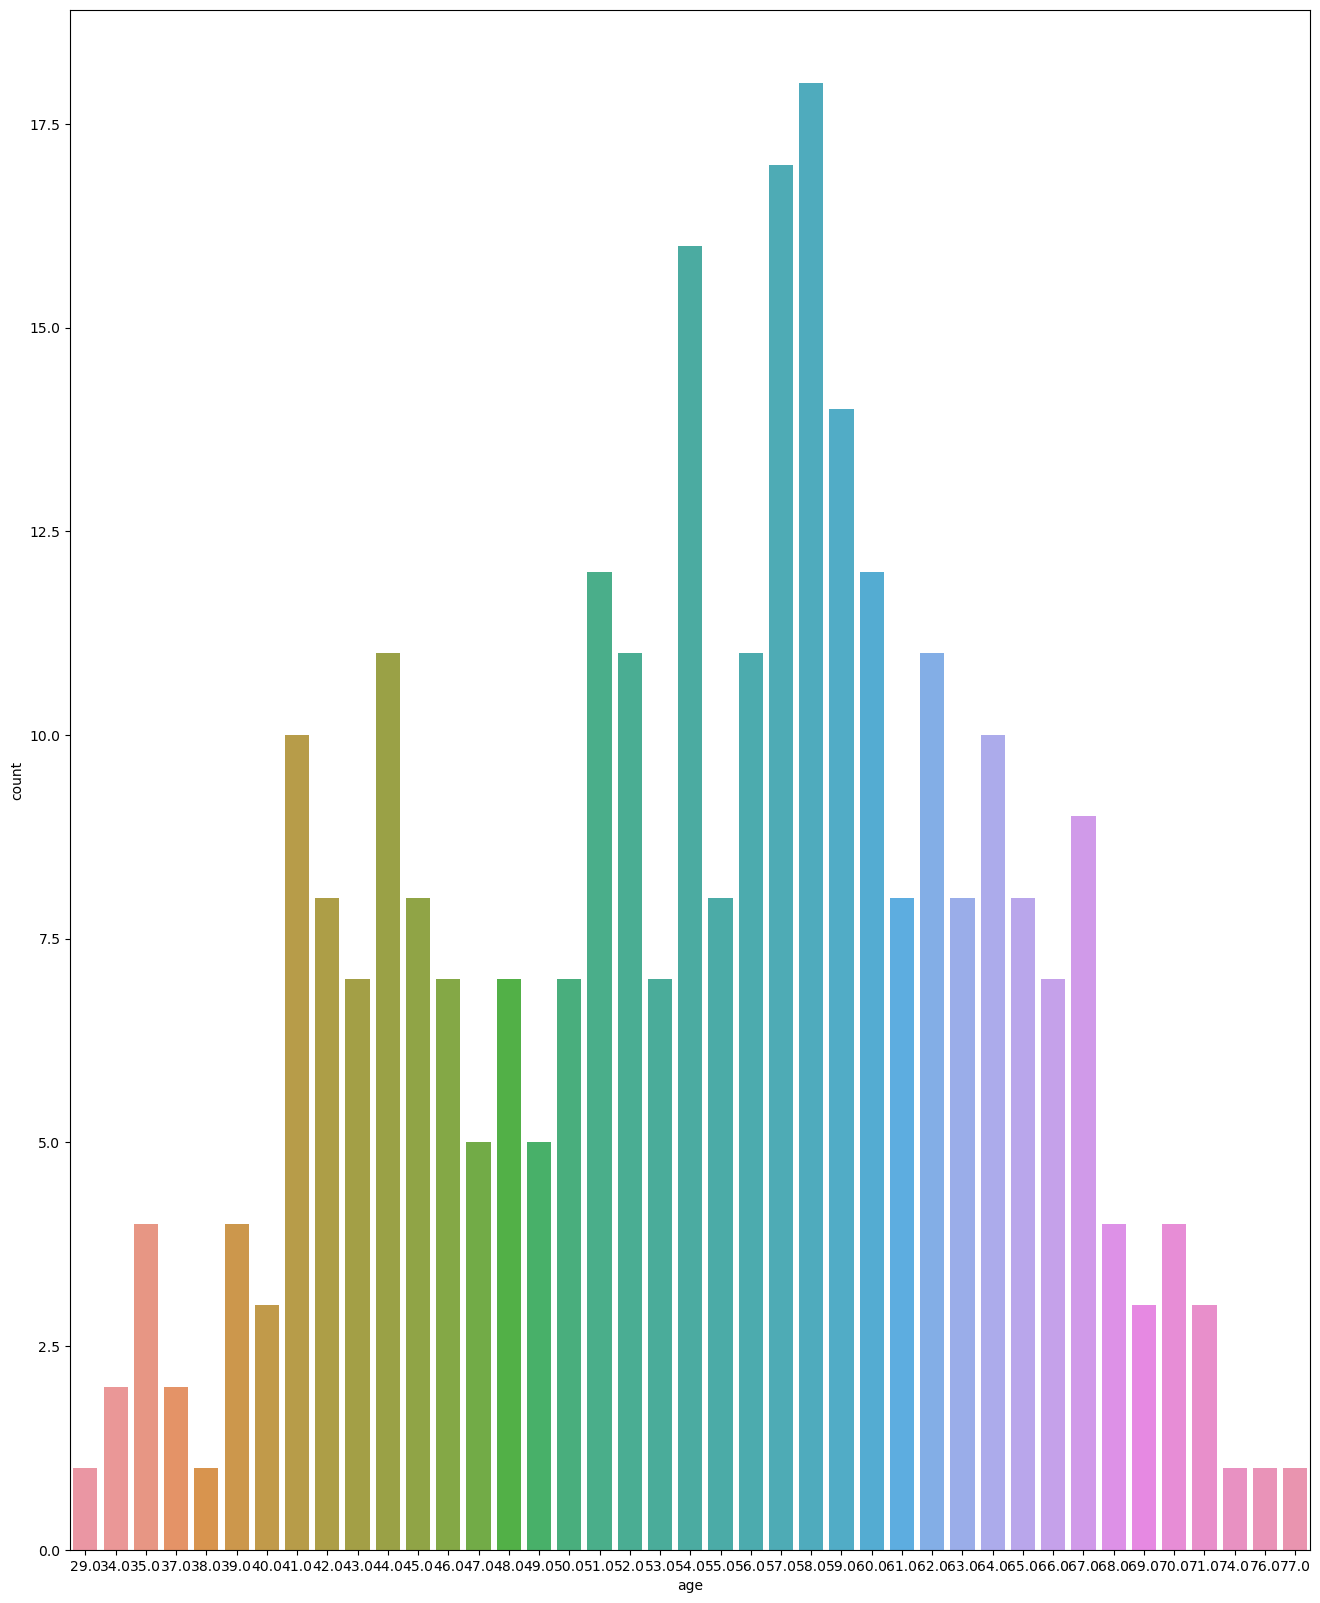

In [22]:
plt.figure(figsize=(16,20))
sns.countplot(x='age', data=df, )
plt.show()

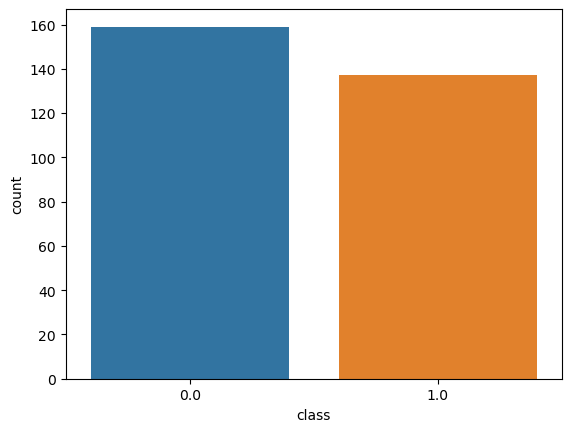

In [23]:
sns.countplot(x='class', data=df, )
plt.show()

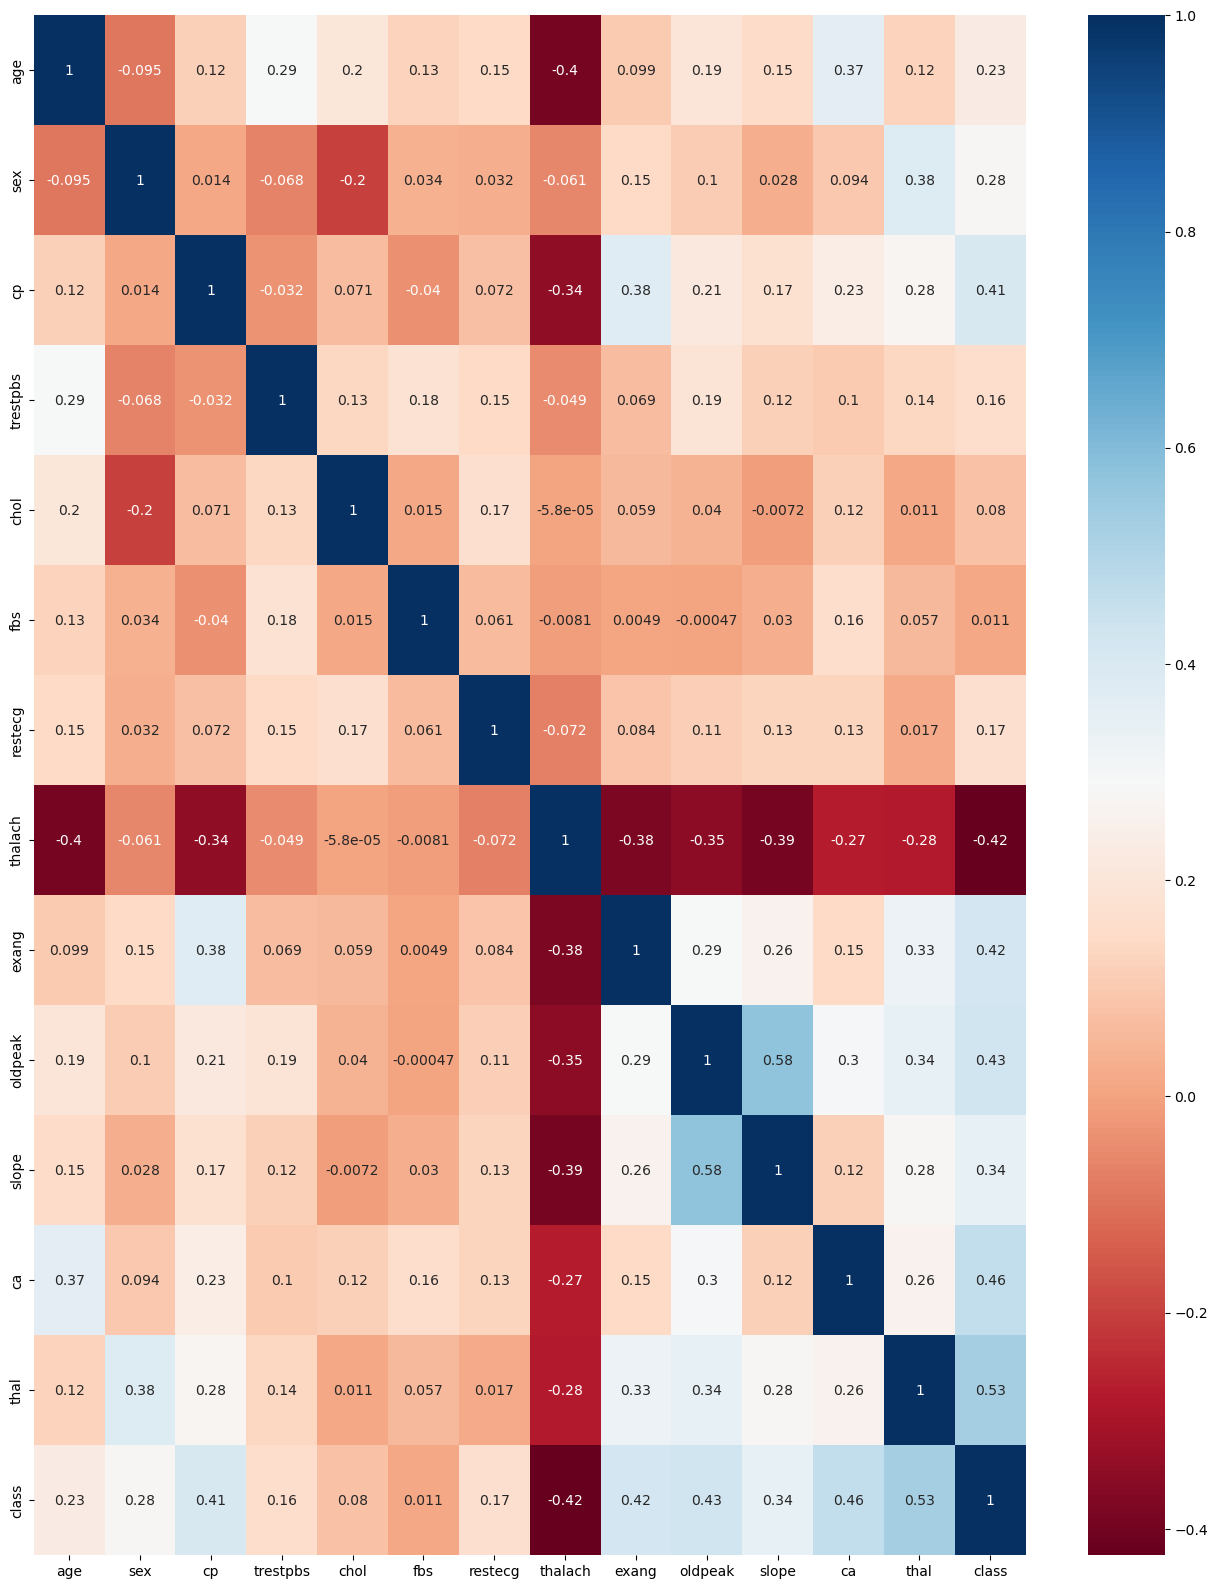

In [24]:
plt.figure(figsize=(16,20))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

### Training our Machine Learning Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,  classification_report, ConfusionMatrixDisplay #plot_confusion_matrix,
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [57]:
def score_summary(names, classifiers):
    '''
    Given a list of classifiers, this function calculates the accuracy, 
    ROC_AUC, Recall and returns the values in a dataframe
    '''
    
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_list = []
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matrix, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        
        # precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2 * recall * precision / (recall + precision)

        data_list.append([name, accuracy * 100, roc_auc, recall, precision, f1])
    
    data_table = pd.DataFrame(data_list, columns=cols)
    
    return np.round(data_table.reset_index(drop=True), 2)



def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)
        disp.plot(cmap='Blues', values_format='.4g')
        ax.set_title(names[i])
        i += 1

    plt.tight_layout()
    plt.show()

    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

### split the data into train and test sets

In [1]:
seed = 0
test_size = 0.25

# features = df.columns[:-1]
features = df.iloc[:, :-1].columns


X = df[features]
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)



names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net",
    "Extra Tree",
    "XGBoost"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed, max_iter=1000),
    LogisticRegression(random_state=seed, max_iter=1000),
    KNeighborsClassifier(8),
    SVC(random_state=seed),
    SVC(kernel="linear", random_state=seed),
    SVC(kernel="sigmoid", random_state=seed),
    SVC(kernel="poly", random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    XGBClassifier()


    # LGBMClassifier(n_estimators=10000, num_leaves=40)
    # SMOTE(sampling_strategy='not majority')
]

classifiers2 = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(8),
    SVC(kernel="linear"),
    SVC(kernel="sigmoid"),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    XGBClassifier()
]

NameError: name 'df' is not defined

In [28]:

# score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
# .style.background_gradient(cmap='coolwarm')\
# .bar(subset=["ROC_AUC",], color='#6495ED')\
# .bar(subset=["Recall"], color='#ff355d')\
# .bar(subset=["Precision"], color='lightseagreen')\
# .bar(subset=["F1"], color='gold')

In [52]:
summary_table = score_summary(names, classifiers).sort_values(by='Accuracy' , ascending=False)

styled_table = summary_table.style.background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC"], color='#6495ED') \
    .bar(subset=["Recall"], color='#ff355d') \
    .bar(subset=["Precision"], color='lightseagreen') \
    .bar(subset=["F1"], color='gold')

styled_table

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
12,Extra Tree,87.840000,0.910000,0.790000,0.930000,0.850000
0,Logistic Regression,83.780000,0.900000,0.790000,0.840000,0.810000
8,Naive Bayes,83.780000,0.890000,0.760000,0.860000,0.810000
9,Linear DA,83.780000,0.910000,0.790000,0.840000,0.810000
11,Neural Net,83.780000,0.870000,0.760000,0.860000,0.810000
3,Nu SVC,82.430000,0.880000,0.790000,0.810000,0.800000
10,Quadratic DA,81.080000,0.850000,0.790000,0.790000,0.790000
5,Random Forest,79.730000,0.890000,0.700000,0.820000,0.750000
13,XGBoost,79.730000,0.870000,0.730000,0.800000,0.760000
6,AdaBoost,77.030000,0.880000,0.760000,0.740000,0.750000


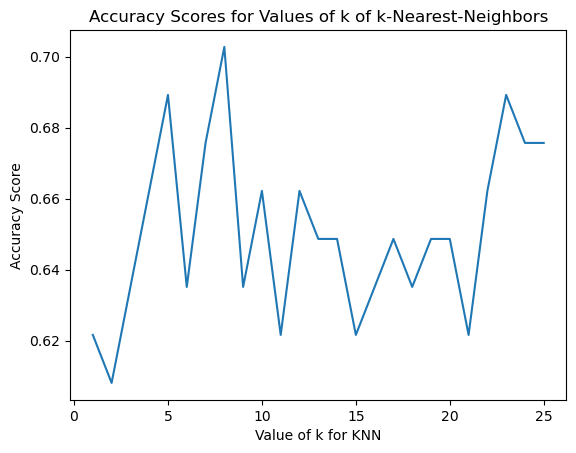

In [30]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_val)
    scores.append(accuracy_score(y_val, prediction_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

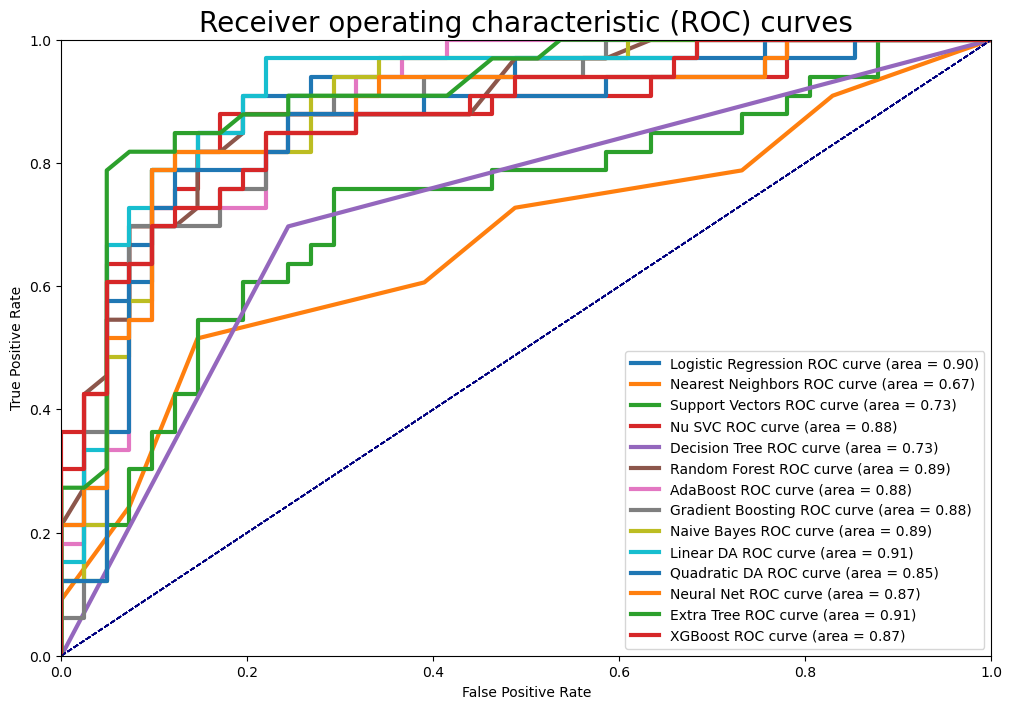

In [53]:
roc_auc_curve(names, classifiers)


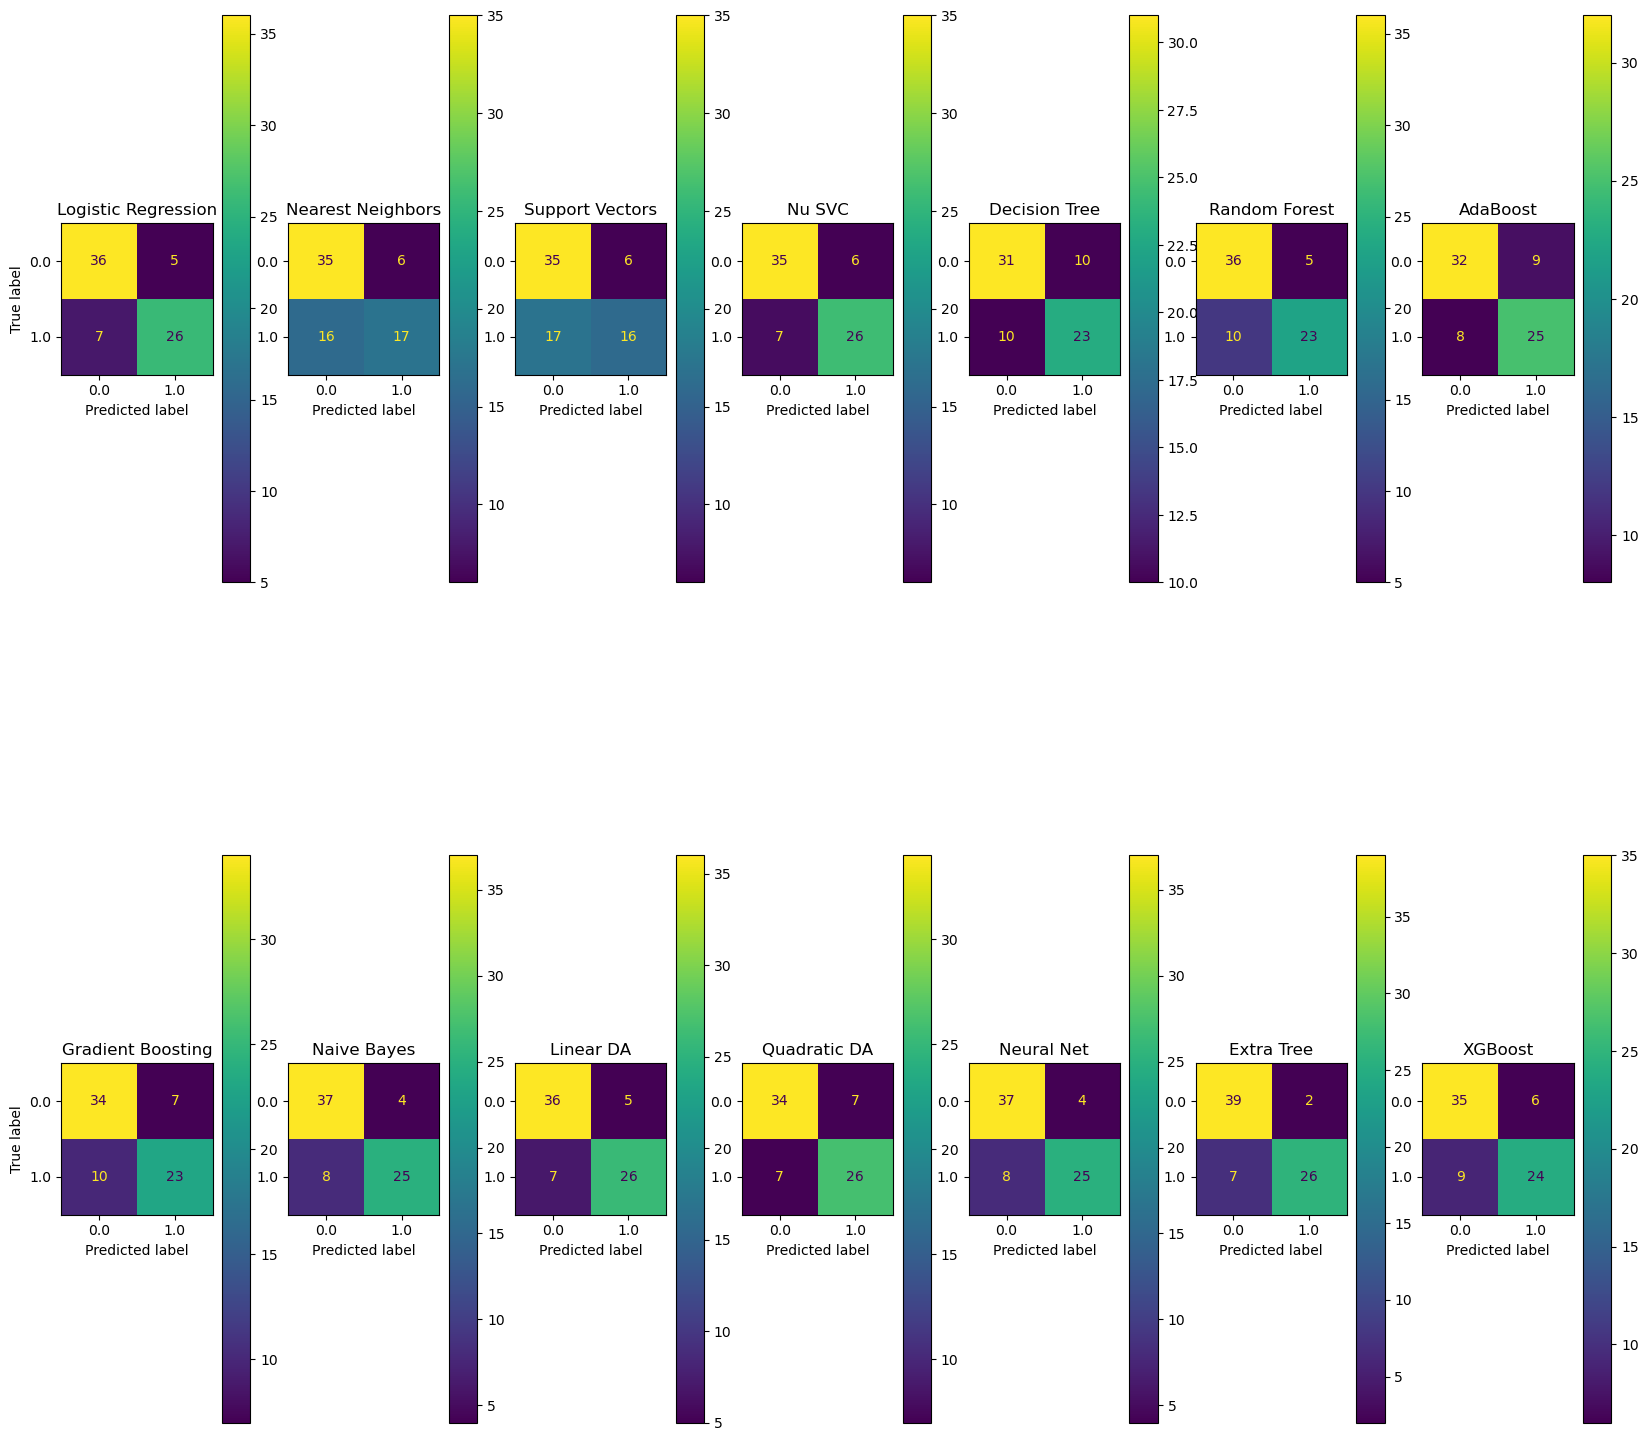

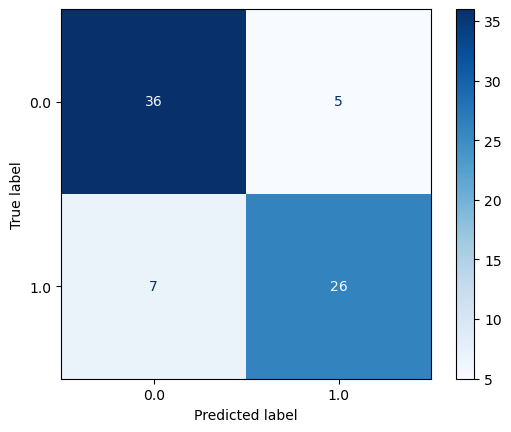

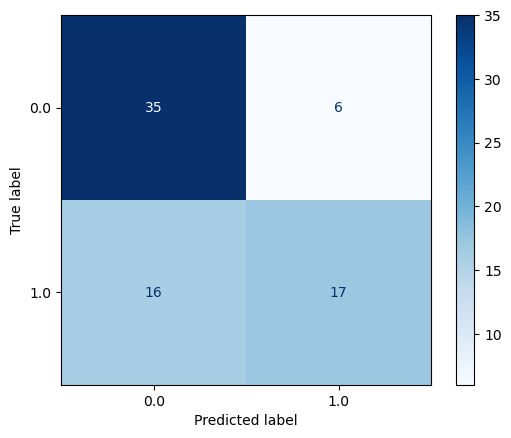

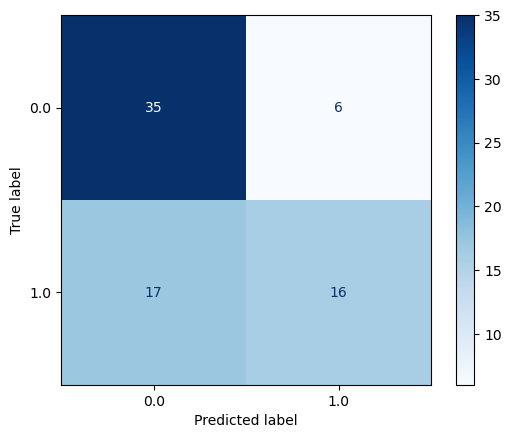

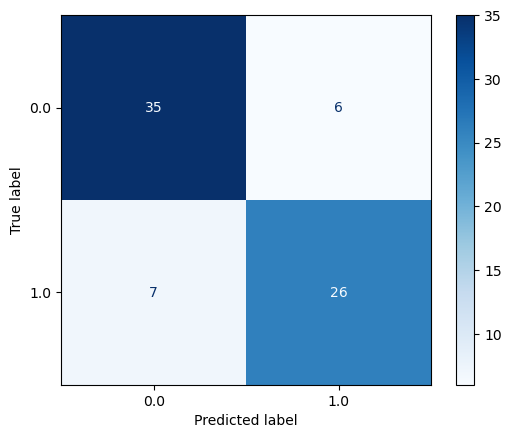

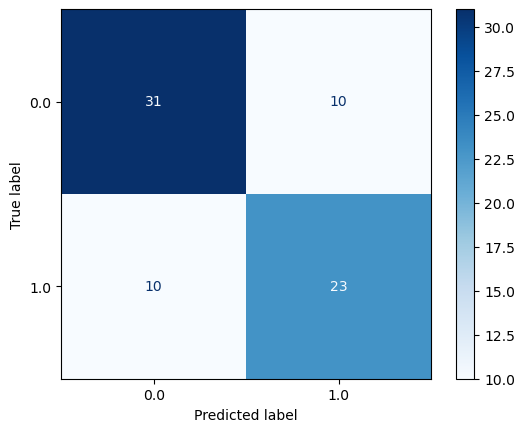

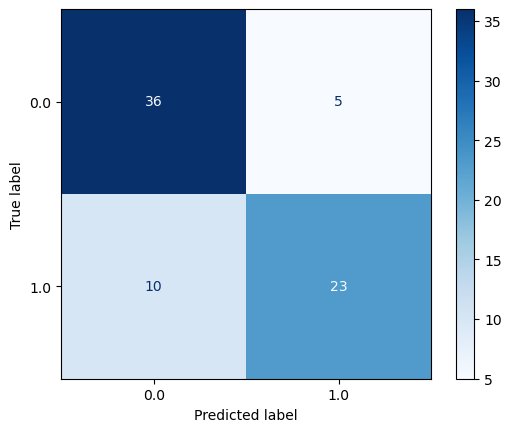

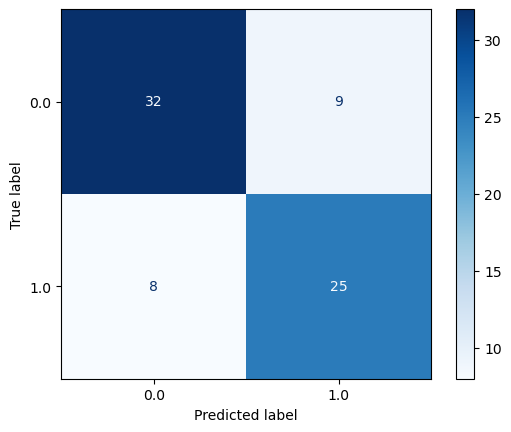

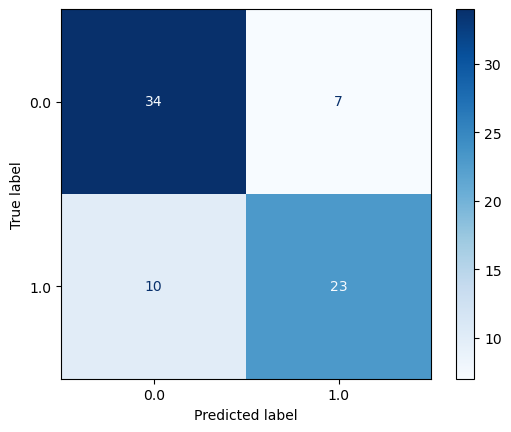

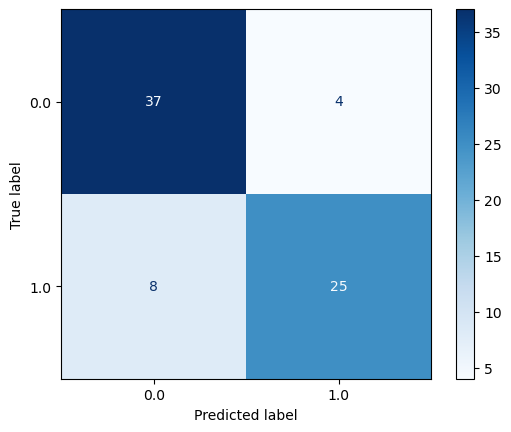

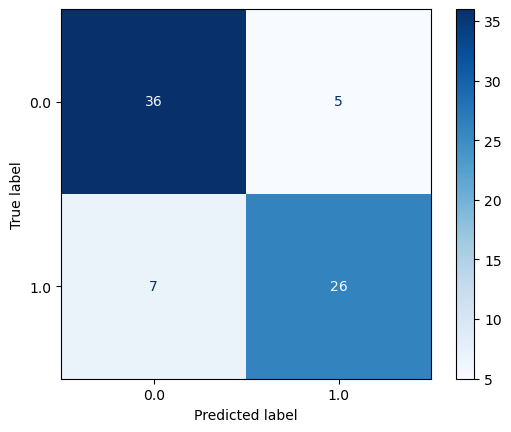

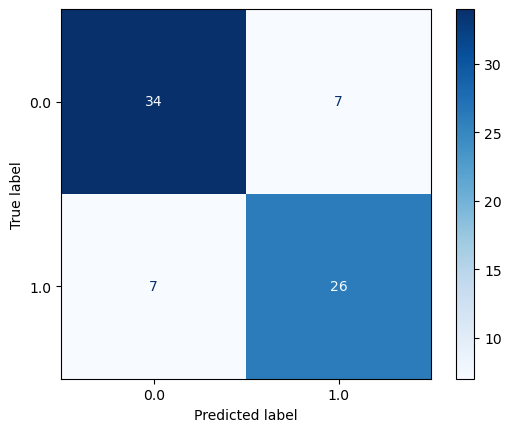

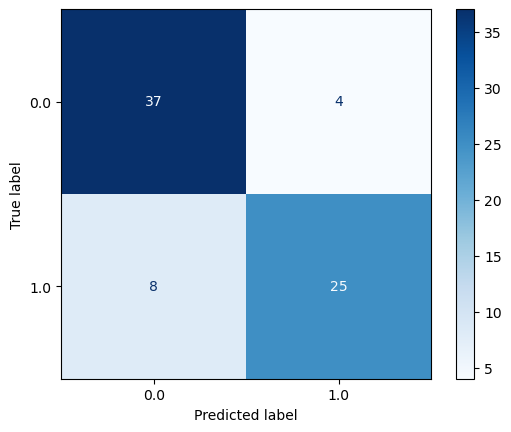

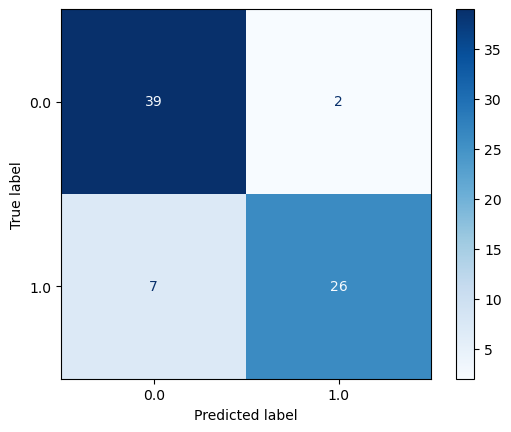

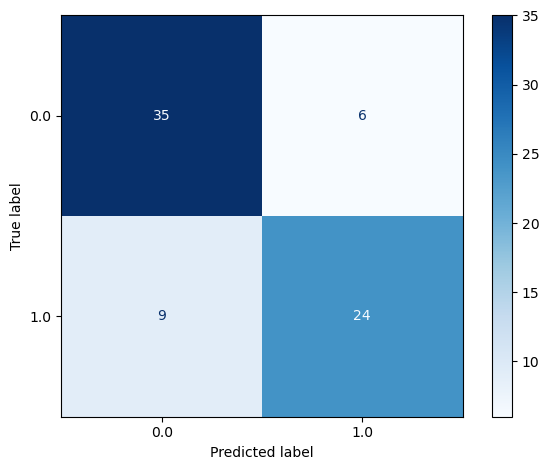

In [56]:
plot_conf_matrix(names, classifiers, nrows=2, ncols=7, fig_a=20, fig_b=20)

In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def score_summary_cv(names, classifiers, X, y):
    '''
    Given a list of classifiers, this function calculates the accuracy, 
    ROC_AUC, Recall using cross-validation and returns the values in a dataframe
    '''
    
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_list = []
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
    for name, clf in zip(names, classifiers):        
        # Use cross_val_score for cross-validation
        scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
        accuracy = np.mean(scores)
        
        # Additional metrics using confusion matrix
        cm = cross_val_score(clf, X, y, cv=skf, scoring='roc_auc')
        roc_auc = np.mean(cm)
        
        cm = cross_val_score(clf, X, y, cv=skf, scoring='recall')
        recall = np.mean(cm)
        
        cm = cross_val_score(clf, X, y, cv=skf, scoring='precision')
        precision = np.mean(cm)
        
        f1 = 2 * recall * precision / (recall + precision)

        data_list.append([name, accuracy * 100, roc_auc, recall, precision, f1])
    
    data_table = pd.DataFrame(data_list, columns=cols)
    
    return np.round(data_table.reset_index(drop=True), 2)

# Usage
summary_table_cv = score_summary_cv(names, classifiers, X, y).sort_values(by='Accuracy', ascending=False)

styled_table_cv = summary_table_cv.style.background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC"], color='#6495ED') \
    .bar(subset=["Recall"], color='#ff355d') \
    .bar(subset=["Precision"], color='lightseagreen') \
    .bar(subset=["F1"], color='gold')

styled_table_cv


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
8,Naive Bayes,84.450000,0.900000,0.820000,0.850000,0.830000
9,Linear DA,84.450000,0.900000,0.790000,0.860000,0.820000
0,Logistic Regression,84.120000,0.900000,0.810000,0.840000,0.830000
5,Random Forest,82.420000,0.900000,0.790000,0.830000,0.810000
12,Extra Tree,81.070000,0.910000,0.820000,0.790000,0.800000
11,Neural Net,80.740000,0.880000,0.750000,0.830000,0.790000
3,Nu SVC,80.730000,0.880000,0.770000,0.810000,0.790000
10,Quadratic DA,80.730000,0.880000,0.790000,0.800000,0.790000
6,AdaBoost,79.720000,0.880000,0.770000,0.780000,0.780000
13,XGBoost,79.050000,0.880000,0.750000,0.790000,0.770000


In [61]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

def score_summary_cv(names, classifiers, X, y, folds=5):
    '''
    Given a list of classifiers, this function calculates the accuracy, 
    ROC_AUC, Recall using both K-fold and Stratified K-fold cross-validation
    and returns the values in a dataframe
    '''
    
    cols = ["Classifier", "Accuracy (K-fold)", "ROC_AUC (K-fold)", "Recall (K-fold)", 
            "Precision (K-fold)", "F1 (K-fold)",
            "Accuracy (Stratified K-fold)", "ROC_AUC (Stratified K-fold)", 
            "Recall (Stratified K-fold)", "Precision (Stratified K-fold)", "F1 (Stratified K-fold)"]
    
    data_list = []
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=0)
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    
    for name, clf in zip(names, classifiers):        
        # K-fold cross-validation
        kfold_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
        kfold_accuracy = np.mean(kfold_scores)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')
        kfold_roc_auc = np.mean(kfold_cm)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='recall')
        kfold_recall = np.mean(kfold_cm)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='precision')
        kfold_precision = np.mean(kfold_cm)
        
        kfold_f1 = 2 * kfold_recall * kfold_precision / (kfold_recall + kfold_precision)
        
        # Stratified K-fold cross-validation
        skfold_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
        skfold_accuracy = np.mean(skfold_scores)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='roc_auc')
        skfold_roc_auc = np.mean(skfold_cm)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='recall')
        skfold_recall = np.mean(skfold_cm)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='precision')
        skfold_precision = np.mean(skfold_cm)
        
        skfold_f1 = 2 * skfold_recall * skfold_precision / (skfold_recall + skfold_precision)

        data_list.append([name, kfold_accuracy * 100, kfold_roc_auc, kfold_recall, kfold_precision, kfold_f1,
                          skfold_accuracy * 100, skfold_roc_auc, skfold_recall, skfold_precision, skfold_f1])
    
    data_table = pd.DataFrame(data_list, columns=cols)
    
    return np.round(data_table.reset_index(drop=True), 2)

# Usage
summary_table_cv = score_summary_cv(names, classifiers, X, y, folds=5).sort_values(by='Accuracy (Stratified K-fold)', ascending=False)

styled_table_cv = summary_table_cv.style.background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC (Stratified K-fold)"], color='#6495ED') \
    .bar(subset=["Recall (Stratified K-fold)"], color='#ff355d') \
    .bar(subset=["Precision (Stratified K-fold)"], color='lightseagreen') \
    .bar(subset=["F1 (Stratified K-fold)"], color='gold')

styled_table_cv


,Classifier,Accuracy (K-fold),ROC_AUC (K-fold),Recall (K-fold),Precision (K-fold),F1 (K-fold),Accuracy (Stratified K-fold),ROC_AUC (Stratified K-fold),Recall (Stratified K-fold),Precision (Stratified K-fold),F1 (Stratified K-fold)
8,Naive Bayes,83.440000,0.890000,0.800000,0.830000,0.820000,84.450000,0.900000,0.820000,0.850000,0.830000
9,Linear DA,82.760000,0.900000,0.780000,0.840000,0.810000,84.450000,0.900000,0.790000,0.860000,0.820000
0,Logistic Regression,83.100000,0.890000,0.780000,0.840000,0.810000,84.120000,0.900000,0.810000,0.840000,0.830000
5,Random Forest,81.070000,0.890000,0.790000,0.810000,0.800000,82.420000,0.900000,0.790000,0.830000,0.810000
12,Extra Tree,82.080000,0.900000,0.810000,0.820000,0.810000,81.070000,0.910000,0.820000,0.790000,0.800000
11,Neural Net,76.340000,0.880000,0.830000,0.720000,0.770000,80.740000,0.880000,0.750000,0.830000,0.790000
3,Nu SVC,80.070000,0.870000,0.750000,0.800000,0.780000,80.730000,0.880000,0.770000,0.810000,0.790000
10,Quadratic DA,79.720000,0.850000,0.760000,0.790000,0.780000,80.730000,0.880000,0.790000,0.800000,0.790000
6,AdaBoost,77.350000,0.850000,0.750000,0.760000,0.760000,79.720000,0.880000,0.770000,0.780000,0.780000
13,XGBoost,78.040000,0.860000,0.760000,0.770000,0.760000,79.050000,0.880000,0.750000,0.790000,0.770000
